In [2]:
import pandas as pd

df=pd.read_csv("/Users/npatel237/LawChatBot/Results/cleaned_evaluation_results.csv")
print(df.columns)
print(df.shape)

Index(['query', 'gemini_weight', 'voyage_weight', 'indices', 'response',
       'time', 'indices_parsed', 'gemini_top_values', 'gemini_top_avg',
       'query_length', 'response_length', 'weight_ratio', 'time_winsorized'],
      dtype='object')
(2001, 13)


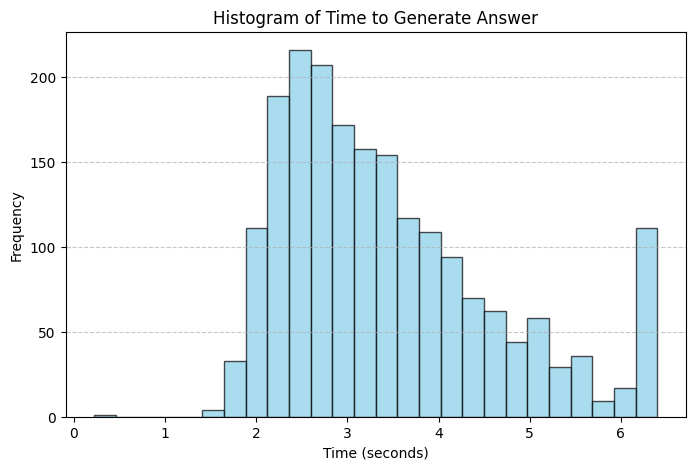

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))
plt.hist(df['time_winsorized'], bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Time to Generate Answer')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
len(df['response'].unique())

1985

In [5]:
filtered_df = df[df['response'].str.contains("I am unable to answer your question.", na=False)]

# Display the result
print(len(filtered_df))

45


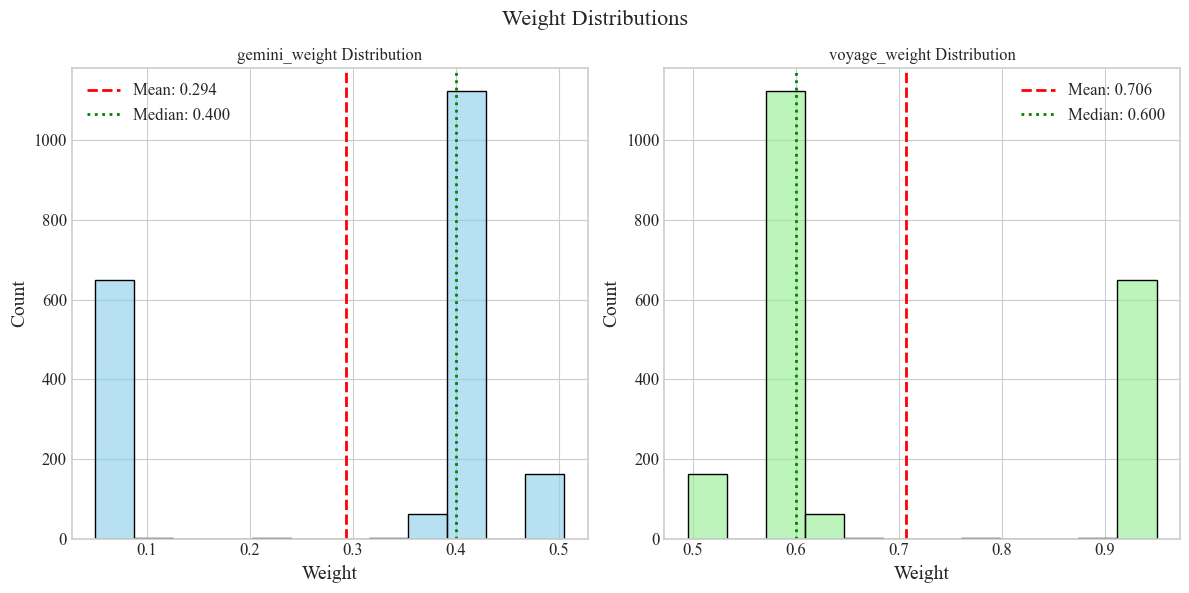


Summary statistics for gemini_weight:
count    2001.000000
mean        0.293621
std         0.171673
min         0.050000
25%         0.050000
50%         0.400000
75%         0.400000
max         0.505000
Name: gemini_weight, dtype: float64

Summary statistics for voyage_weight:
count    2001.000000
mean        0.706379
std         0.171673
min         0.495000
25%         0.600000
50%         0.600000
75%         0.950000
max         0.950000
Name: voyage_weight, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_weight_distribution(df, column_name, color, ax):
    """
    Plot the distribution of weights using a histogram with counts.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    column_name : str
        The column to analyze
    color : str
        Color for the plot
    ax : matplotlib.axes.Axes
        The axis to plot on
    """
    # Plot histogram
    sns.histplot(df[column_name], kde=False, color=color, ax=ax, stat='count', alpha=0.6)
    
    # Add mean line
    mean = df[column_name].mean()
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.3f}')
    
    # Add median line
    median = df[column_name].median()
    ax.axvline(median, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median:.3f}')
    
    # Customize the plot
    ax.set_title(f'{column_name} Distribution')
    ax.set_xlabel('Weight')
    ax.set_ylabel('Count')
    ax.legend()

# Set up the plot
plt.figure(figsize=(12, 6))
plt.suptitle('Weight Distributions', fontsize=16)

# Create subplots
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# Plot distributions
plot_weight_distribution(df, 'gemini_weight', 'skyblue', ax1)
plot_weight_distribution(df, 'voyage_weight', 'lightgreen', ax2)

# Adjust layout and display
plt.tight_layout()
plt.savefig('weight_distributions_count.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
for column in ['gemini_weight', 'voyage_weight']:
    print(f"\nSummary statistics for {column}:")
    print(df[column].describe())


In [3]:
df.head()

,query,gemini_weight,voyage_weight,indices,response,time,indices_parsed,gemini_top_values,gemini_top_avg,query_length,response_length,weight_ratio,time_winsorized
0,Given the proscriptions enumerated in 18 U.S.C...,0.050,0.950,{'sections': {'gemini_top_values': [0.00067548...,I am unable to answer the question. The text d...,6.794770,{'sections': {'gemini_top_values': [0.00067548...,[0.0006754828500561416],0.000675,1060,401,0.052632,6.400722
1,"Under 18 U.S.C. § 1030(a)(5), what constitutes...",0.370,0.630,{'sections': {'gemini_top_values': [0.00068475...,"Under 18 U.S.C. § 1030(a)(5), several actions ...",3.177490,{'sections': {'gemini_top_values': [0.00068475...,"[0.000684750615619123, 0.00067992223193869, 0....",0.000679,662,1862,0.587302,3.177490
2,"The Computer Fraud and Abuse Act (CFAA), speci...",0.505,0.495,{'sections': {'gemini_top_values': [0.00067205...,"Under 18 U.S.C. § 1030, the Computer Fraud and...",2.736069,{'sections': {'gemini_top_values': [0.00067205...,"[0.0006720511009916663, 0.0006705024861730635,...",0.000670,553,964,1.020202,2.736069
3,What happens if someone messes with a computer...,0.400,0.600,{'sections': {'gemini_top_values': [0.00067096...,"Yes, a person can face legal consequences for ...",4.961439,{'sections': {'gemini_top_values': [0.00067096...,"[0.0006709627923555672, 0.0006709298468194902]",0.000671,421,3012,0.666667,4.961439
4,"Given 18 U.S.C. § 1531, specifically subsectio...",0.050,0.950,{'sections': {'gemini_top_values': [0.00067709...,"Based on the provided legal documents, I am un...",2.280774,{'sections': {'gemini_top_values': [0.00067709...,[0.0006770953186787665],0.000677,1022,455,0.052632,2.280774
